# Refining Raw Audio

In this tutorial, you will learn how to apply `VocalForge.audio` pipelines on audio files.

Each pipeline will (or at least attempt to) remove poor/inappropiate audio from each file in order to better prime it for dataset creation, or whatever other purpose you have in mind. These can be done in different order, or some not at all. It's up to you!

The models generally consist of a neural network designed to identify a specific piece of audio, then mark timestamps for its removal. Let's go over the ones currently supported in order to better illistrates VocalForge's usefulness:

- `Voice Detection` will remove segments of audio in which no human sounds are found. Say there is a long segment of city noise, or a musical intro to a podcast, all of this is removed. This is helpful not only in that it removes any of that non human audio, but it also reduces the time in which the subsequent audio takes to process.

- `Overlap` covers speech that has two or more people talking at the same time. Not only does it forceably remove egotistical people from trying to take over a conversation, but it *also* removes poor audio from podcasts or other casual conversational settings.

- `Isolate` one of the less straightforward pipelines, it goes through and seperates each speaker in each audio file. From there, you as a user can specify a specific speaker you want to target and it will find that same user across each audio file, even in different recording enviroments, such as a recording studio and a park. 

- `Export` is really just to put everything in a nice little bow. Given a directory, it will format on sample rate, as well as optionally normalize and noise reduce the audio. 

More pipelines are coming soon™

NOTE: It is highly reccomended to run this on a conda enviroment if running locally by running the command
`conda create -n VocalForge python=3.8 pytorch=1.11.0 torchvision=0.12.0 torchaudio=0.11.0 cudatoolkit=11.3.1 -c pytorch`

### Getting Started

First, let's get to creating our work directory and installing `VocalForge`

In [1]:
from pathlib import Path

root_path = Path.cwd()  # Gets current working directory
print(root_path)

work_audio_path = root_path / 'work' / 'audio'  # Constructs a new path

work_audio_path.mkdir(parents=True, exist_ok=True)  # Creates all missing parents in the path (does not raise any exceptions if the directory already exists)

/home/jupyter-tsantana/VocalForge


In [2]:
from VocalForge.audio.audio_utils import create_core_folders

root_path = Path.cwd()
work_audio_path = root_path / 'work' / 'audio'

folder_names = ['RawAudio', 'Samples', 'VD', 'Overlap', 'Verification',
                'Isolated', 'Noise_Removed', 'Normalized', 'WhisperSamples',
                'Segmented', 'Dataset']

# Here, we pass the folder paths to 'create_core_folders' method as string instead of 'os.path.join'
create_core_folders(folder_names, workdir=str(work_audio_path))

INFO:speechbrain.utils.quirks:Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
INFO:speechbrain.utils.quirks:Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
/home/jupyter-tsantana/.conda/envs/vocalforge/lib/python3.8/site-packages/df/io.py:9: UserWarning: `torchaudio.backend.common.AudioMetaData` has been moved to `torchaudio.AudioMetaData`. Please update the import path.
  from torchaudio.backend.common import AudioMetaData


Alright cool, thats all taken care of. Now for the sake of our demo, we will download a YouTube Playlist of Joe Biden, however you could link your own playlist or simply drop your own local wav files into the `RawAudio` folder.

In [3]:
from VocalForge.audio.audio_utils import download_videos

work_path = Path.cwd() / 'work' / 'audio'

download_videos(
    url='https://www.youtube.com/playlist?list=PLAVNH_8nglubKvZ8bdiEjf9IKKB73SvIy', 
    out_dir=str(work_path / 'RawAudio')
)


Deprecated Feature: Support for Python version 3.8 has been deprecated. Please update to Python 3.9 or above


[youtube:tab] Extracting URL: https://www.youtube.com/playlist?list=PLAVNH_8nglubKvZ8bdiEjf9IKKB73SvIy
[youtube:tab] PLAVNH_8nglubKvZ8bdiEjf9IKKB73SvIy: Downloading webpage
[youtube:tab] PLAVNH_8nglubKvZ8bdiEjf9IKKB73SvIy: Redownloading playlist API JSON with unavailable videos
[download] Downloading playlist: Biden
[youtube:tab] PLAVNH_8nglubKvZ8bdiEjf9IKKB73SvIy page 1: Downloading API JSON


[youtube:tab] PLAVNH_8nglubKvZ8bdiEjf9IKKB73SvIy page 1: Downloading API JSON


[youtube:tab] PLAVNH_8nglubKvZ8bdiEjf9IKKB73SvIy page 1: Downloading API JSON


[youtube:tab] PLAVNH_8nglubKvZ8bdiEjf9IKKB73SvIy page 1: Downloading API JSON


[youtube:tab] Playlist Biden: Downloading 6 items of 6
[download] Downloading item 1 of 6
[youtube] Extracting URL: https://www.youtube.com/watch?v=u1UC89H4Swc
[youtube] u1UC89H4Swc: Downloading webpage
[youtube] u1UC89H4Swc: Downloading ios player API JSON
[youtube] u1UC89H4Swc: Downloading mweb player API JSON
[youtube] u1UC89H4Swc: Downloading player 2d24ba15
[youtube] u1UC89H4Swc: Downloading m3u8 information
[info] u1UC89H4Swc: Downloading 1 format(s): 251
[download] Destination: /home/jupyter-tsantana/VocalForge/work/audio/RawAudio/President Joe Biden： The 2022 60 Minutes Interview.webm
[download] 100% of   19.30MiB in 00:00:00 at 36.37MiB/s    
[ExtractAudio] Destination: /home/jupyter-tsantana/VocalForge/work/audio/RawAudio/President Joe Biden： The 2022 60 Minutes Interview.wav
Deleting original file /home/jupyter-tsantana/VocalForge/work/audio/RawAudio/President Joe Biden： The 2022 60 Minutes Interview.webm (pass -k to keep)
[download] Downloading item 2 of 6
[youtube] Extract

For actual production, we would want to process all the audio we can get our grubby hands on. But for the purposes of our demo, we will be trimming each audio down to 5 minutes using the `create_samples` method  

In [4]:
from VocalForge.audio.audio_utils import create_samples

work_path = Path.cwd() / 'work' / 'audio'

create_samples(
    length=300,
    input_dir=str(work_path / 'RawAudio'),
    output_dir=str(work_path / 'Samples'),
)


Creating Samples: 100%|██████████| 7/7 [00:01<00:00,  6.08it/s]


In [ ]:
from IPython.display import Audio

work_path = Path.cwd() / 'work' / 'audio'

Audio(str(work_path / 'Samples' / 'DATA0.wav'))

### Voice Activity

Initialize the class and set the paths of what the input files are, and where to output the filtered files are.

In [6]:
from VocalForge.audio import VoiceDetection

work_path = Path.cwd() / 'work' / 'audio'

VD = VoiceDetection(
    input_dir=str(work_path / 'Samples'),
    output_dir=str(work_path / 'VD'),
)

VD.run()

/home/jupyter-tsantana/.conda/envs/vocalforge/lib/python3.8/site-packages/pyannote/audio/pipelines/speaker_verification.py:43: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import (
[NeMo W 2024-11-18 17:58:52 nemo_logging:349] /home/jupyter-tsantana/.conda/envs/vocalforge/lib/python3.8/site-packages/megatron/core/tensor_parallel/layers.py:243: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
      def forward(
    
[NeMo W 2024-11-18 17:58:52 nemo_logging:349] /home/jupyter-tsantana/.conda/envs/vocalforge/lib/python3.8/site-packages/megatron/core/tensor_parallel/layers.py:254: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..

Model was trained with pyannote.audio 0.0.1, yours is 3.3.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.7.1, yours is 2.4.1+cu121. Bad things might happen unless you revert torch to 1.x.


Analyzing files:   0%|          | 0/7 [00:00<?, ?it/s][NeMo W 2024-11-18 17:58:54 nemo_logging:349] /home/jupyter-tsantana/.conda/envs/vocalforge/lib/python3.8/site-packages/pyannote/audio/utils/reproducibility.py:74: ReproducibilityWarning: TensorFloat-32 (TF32) has been disabled as it might lead to reproducibility issues and lower accuracy.
    It can be re-enabled by calling
       >>> import torch
       >>> torch.backends.cuda.matmul.allow_tf32 = True
       >>> torch.backends.cudnn.allow_tf32 = True
    See https://github.com/pyannote/pyannote-audio/issues/1370 for more details.
    
      warnings.warn(
    
Exporting Speech Segments: 100%|██████████| 7/7 [00:01<00:00,  6.52it/s]

Analyzed files for voice detection


Alright! Lets check out the timeline of an audio file to see what parts got deleted.

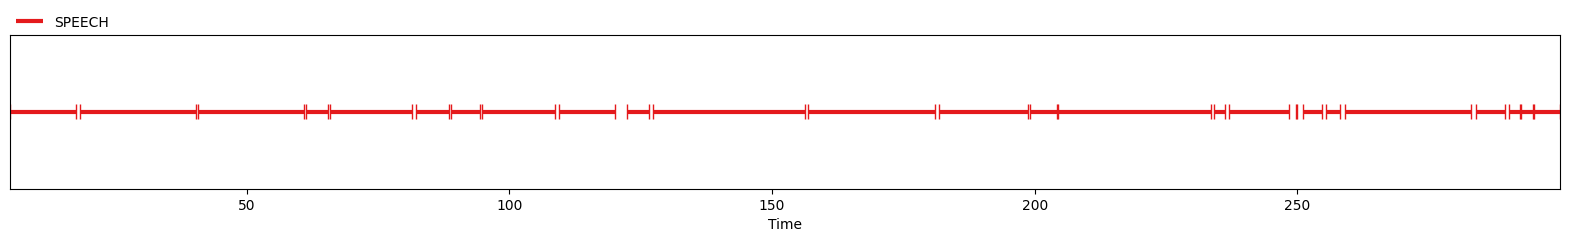

In [7]:
VD.timelines[0]

In [ ]:
from IPython.display import Audio

work_path = Path.cwd() / 'work' / 'audio'

Audio(str(work_path / 'VD' / 'DATA0.wav'))


Let's say that the audio highlighted in red has too many short breaks which cause to abrupt cuts in the audio. we can change around some model parameters to change this. by modifying the `min_duration_off` and `min_duration_on` values

In [9]:

HYPER_PARAMETERS = {
  # onset/offset activation thresholds
  "onset": 0.2, "offset": 0.6,
  # remove speech regions shorter than that many seconds.
  "min_duration_on": 1.0,
  # fill non-speech regions shorter than that many seconds.
  "min_duration_off": 1.0
}

The default values are normally:

`Onset: 0.5`
`Offset: 0.5`
`min_duration_on: 0.0`
`min_duration_off: 0.0`

One can change any of these values to make the values a little more or less liberal in what is speech and what's not (see what I did there?). This can also be used for overlapping speech, however this feature does not exist for isolating voices.

### Overlapping Removal

In [10]:
# Overlap Detection
from VocalForge.audio import Overlap

OD = Overlap(
    input_dir=str(work_path / 'VD'),
    output_dir=str(work_path / 'Overlap')
)
OD.run()

Lightning automatically upgraded your loaded checkpoint from v1.1.3 to v2.0.7. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../.cache/torch/pyannote/models--pyannote--segmentation/snapshots/059e96f964841d40f1a5e755bb7223f76666bba4/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.3.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.7.1, yours is 2.4.1+cu121. Bad things might happen unless you revert torch to 1.x.


Exporting Speech Segments: 100%|██████████| 7/7 [00:00<00:00, 12.38it/s]

Analyzed files for voice detection


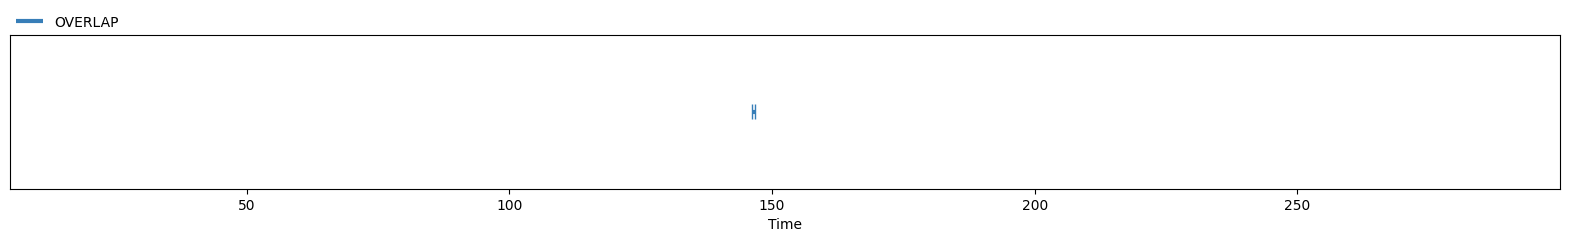

In [11]:
OD.timelines[0]

In [ ]:
from IPython.display import Audio

work_path = Path.cwd() / 'work' / 'audio'

Audio(str(work_path / 'Overlap' / 'DATA0.wav'))

## Speaker Isolation

In [13]:
from VocalForge.audio.isolate import Isolate
from pathlib import Path
work_path = Path.cwd() / 'work' / 'audio'

IV = Isolate(
    input_dir=str(work_path / 'Overlap'),
    verification_dir=str(work_path / 'Verification'),  # this is where the separated voices will be saved
    output_dir=str(work_path / 'Isolated'),  # this is where the targeted voice will be saved
)

Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.0.7. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../.cache/torch/pyannote/models--pyannote--segmentation/snapshots/c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b/pytorch_model.bin`
INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
[NeMo W 2024-11-18 18:00:20 nemo_logging:349] /home/jupyter-tsantana/.conda/envs/vocalforge/lib/python3.8/site-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
      wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
    
INFO:speechbrain.utils.fetching:Fetch e

Model was trained with pyannote.audio 0.0.1, yours is 3.3.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.4.1+cu121. Bad things might happen unless you revert torch to 1.x.


INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch label_encoder.txt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: embedding_model, mean_var_norm_emb, classifier, label_encoder
[NeMo W 2024-11-18 18:00:20 nemo_logging:349] /home/jupyter-tsantana/.conda/envs/vocalforge/lib/python3.8/site-packages/speechbrain/utils/checkpoints.py:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/m

In [14]:
IV.isolate_speakers()

Isolating Speakers in each file: 100%|██████████| 7/7 [00:25<00:00,  3.70s/it]


In [ ]:
from IPython.display import Audio

work_path = Path.cwd() / 'work' / 'audio'

Audio(str(work_path / 'Verification' / 'DATA0' / 'SPEAKER_00.wav'))

In [ ]:
Audio(str(work_path / 'Verification' / 'DATA0' / 'SPEAKER_01.wav'))

In [17]:
IV.create_target_embedding(str(work_path / 'Verification' / 'DATA0' / 'SPEAKER_00.wav'), 'joe_biden')

In [18]:
IV.group_audios_by_speaker(threshold=0.25)

Grouping audios by speaker: 100%|██████████| 7/7 [00:01<00:00,  4.28it/s]


In [ ]:
from IPython.display import Audio

work_path = Path.cwd() / 'work' / 'audio'

Audio(str(work_path / 'Isolated' / 'joe_biden' / 'DATA2_SPEAKER_01.wav'))

In [ ]:
Audio(str(work_path / 'Isolated' / 'joe_biden' / 'DATA4_SPEAKER_01.wav'))

In [ ]:
Audio(str(work_path / 'Isolated' / 'joe_biden' / 'DATA5_SPEAKER_00.wav'))

In [ ]:
Audio(str(work_path / 'Isolated' / 'joe_biden' / 'DATA6_SPEAKER_01.wav'))

## Export

Now to export. This is how we can define the final output of the wav files. 

By declaring a directory to `noise_removed_dir` will apply deepfilternet2 to each audio file to reduce noise. I find that this specific NN works best compared to solutions like the Adobe Podcast Audio Upscaler for tasks like TTS training or some other application that requires natural audio processing.

`normalization_dir`, if declared, will export a copy of the exported audio with normalized audio.

In [23]:
from VocalForge.audio import ExportAudio
from pathlib import Path

work_path = Path.cwd() / 'work' / 'audio'

exported = ExportAudio(
    input_dir=str(work_path / 'Isolated' / 'joe_biden'),
    output_dir=str(work_path / 'WhisperSamples'),
    noise_removed_dir=str(work_path / 'Noise_Removed'),
    normalization_dir=str(work_path / 'Normalized'),
)

2024-11-18 18:02:43 | INFO     | DF | Running on torch 2.4.1+cu121
2024-11-18 18:02:43 | INFO     | DF | Running on host blackbird
2024-11-18 18:02:43 | INFO     | DF | Loading model settings of DeepFilterNet3
2024-11-18 18:02:43 | INFO     | DF | Using DeepFilterNet3 model at /home/jupyter-tsantana/.cache/DeepFilterNet/DeepFilterNet3
2024-11-18 18:02:43 | INFO     | DF | Initializing model `deepfilternet3`
2024-11-18 18:02:43 | INFO     | DF | Found checkpoint /home/jupyter-tsantana/.cache/DeepFilterNet/DeepFilterNet3/checkpoints/model_120.ckpt.best with epoch 120


fatal: not a git repository (or any of the parent directories): .git
[NeMo W 2024-11-18 18:02:43 nemo_logging:349] /home/jupyter-tsantana/.conda/envs/vocalforge/lib/python3.8/site-packages/df/checkpoint.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Ple

2024-11-18 18:02:43 | INFO     | DF | Running on device cuda:0
2024-11-18 18:02:43 | INFO     | DF | Model loaded


### Noise Removal

In [24]:
exported.noise_remove()

Removing Noise: 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


In [ ]:
from IPython.display import Audio

work_path = Path.cwd() / 'work' / 'audio'

Audio(str(work_path / 'Noise_Removed' / 'DATA0_SPEAKER_00.wav'))

### Normalization

In [26]:
exported.normalize()

Normalizing: 100%|██████████| 5/5 [00:00<00:00, 17.78it/s]


### Create Whisper-Ready Samples

In [27]:
exported.create_samples(max_seconds=120)

Creating Samples: 100%|██████████| 5/5 [00:00<00:00, 34.77it/s]


And you're done! Well, sort of. While this process does a pretty good job, to get the best results you will want to check the results manually. As I add more filters, this process will hopefully increase in resolution to reduce the time needed to review the output. But for now, stay vigilent.

Next, we will be going over how to format this now refined audio into a dataset ready and prepped for a NN.

## Transcription

In [30]:
from dotenv import load_dotenv

load_dotenv('untitled.env')

True

In [31]:
from VocalForge.text import Transcribe

transcriber = Transcribe(
    input_dir=str(work_path / 'WhisperSamples'),
    segmented_audio_dir=str(work_path / 'Segmented'),
    dataset_dir=str(work_path / 'Dataset'),
)

In [32]:
transcriber.transcribe()

Transcribing: 100%|██████████| 10/10 [01:08<00:00,  6.88s/it]


In [33]:
transcriber.process()

Segmenting and Normalizing: 100%|██████████| 10/10 [00:00<00:00, 87.75it/s]


In [34]:
transcriber.to_csv()

In [35]:
import pandas as pd

work_path = Path.cwd() / 'work' / 'audio'

df = pd.read_csv(str(work_path / 'Dataset' / 'dataset.csv'))

df.head(2)

,audio,text,normalized_text
0,/home/jupyter-tsantana/VocalForge/work/audio/S...,"Well, I don't think he will, but I think it's...",well i do not think he will but i think it is ...
1,/home/jupyter-tsantana/VocalForge/work/audio/S...,"The idea that a world leader, one of the larg...",the idea that a world leader one of the larges...


In [40]:
from IPython.display import Audio

work_path = Path.cwd() / 'work' / 'audio'

print(df.at[37, 'text'])
print(df.at[37, 'normalized_text'])

Audio(df.at[37, 'audio'])

 I mean, I can make it sound like all of a sudden, my God, it went to 8.2%.
i mean i can make it sound like all of a sudden my god it went to 8.2%
